In [1]:
from music21 import *


In [2]:
# current implementation meant for testing
def assign(notes):
    fingerings = []
    for nt in notes:
        nt.lyric = '1'
        fingerings.append(nt)
    return fingerings

In [3]:
def get_notes(song):
    notes = []
    for part_staff in song.parts.stream():
        for measure in part_staff:
            if isinstance(measure, stream.Measure):
                for nt in measure:
                    if isinstance(nt, note.Note) or isinstance(nt, chord.Chord):
                        notes.append(nt)
    return notes

In [4]:
def get_fingerings(song):
    fingerings = assign(get_notes(song))
    fingered_song = stream.Stream()
    note_index = 0
    for rpart_staff in song.parts.stream():
        wpart_staff = stream.PartStaff()
        for rmeasure in rpart_staff:
            wmeasure = stream.Measure()
            if isinstance(rmeasure, stream.Measure):
                for rnote in rmeasure:
                    if isinstance(rnote, note.Note):
                        wmeasure.append(fingerings[note_index])
                        note_index += 1
                    else:
                        wmeasure.append(rnote)
            else:
                wmeasure = rmeasure
            wpart_staff.append(wmeasure)
        fingered_song.append(wpart_staff)
    return fingered_song

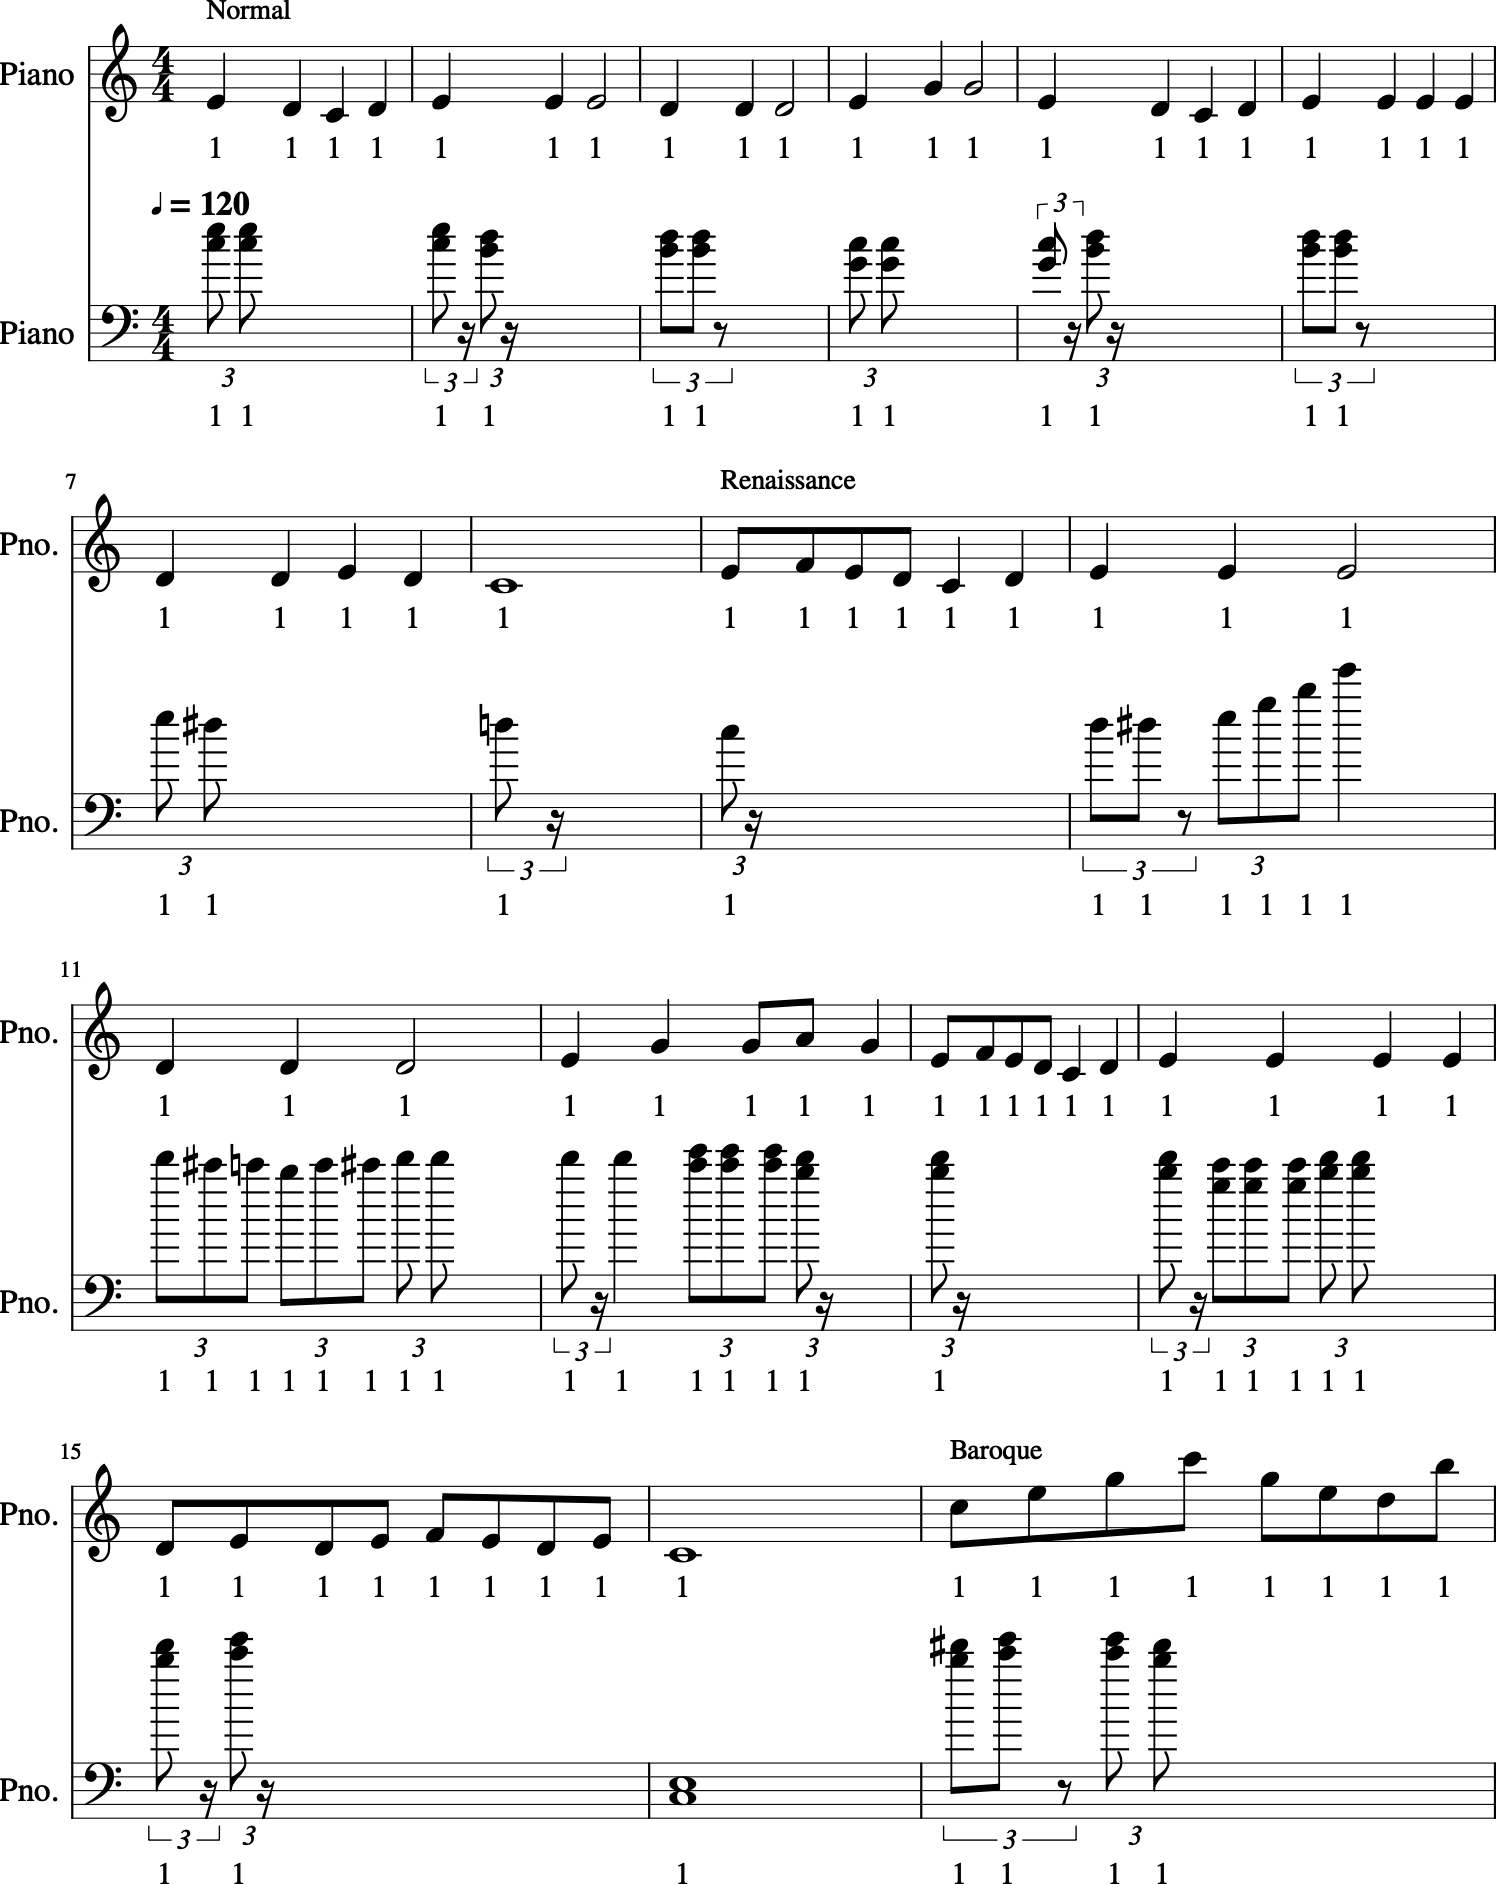

In [5]:
song = converter.parse('samples/mary_had_a_little_lamb.mxl')
fingered_song = get_fingerings(song)
fingered_song.show()